In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")

In [28]:
pwd

'/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge'

In [29]:
path = '/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge/Data/dt'

In [30]:
df1= pd.read_csv(path+'/df1.csv', parse_dates=['Date'])
df1 = df1.rename(columns = {"Date":"ds","Close":"y"}) 
df1 

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,2020-12-24,3703.06,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,2003.949951,48.18,200.5,535972.0,23.85
3875,2020-12-28,3735.36,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,1996.250000,47.50,200.5,535972.0,23.60
3876,2020-12-29,3727.04,0.94,0.09,7404039.0,97.20,1.61,38.2297,6.7,1959.359985,47.85,200.5,535972.0,24.70
3877,2020-12-30,3732.04,0.93,0.09,7363351.0,97.20,1.61,38.2297,6.7,1979.989990,48.24,200.5,535972.0,23.75


In [31]:
import datetime as datetime
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.ds < ctf_date , ].copy()
df

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix
0,2005-06-20,1216.10,4.11,3.04,812235.0,84.81,1.76,18.8026,5.0,641.840027,59.19,154.3,343998.0,148.30
1,2005-06-21,1213.61,4.06,3.04,812235.0,84.81,1.76,18.8026,5.0,641.039978,58.90,154.3,343998.0,149.00
2,2005-06-22,1213.88,3.95,3.04,811179.0,84.81,1.76,18.8026,5.0,643.450012,58.27,154.3,343998.0,148.40
3,2005-06-23,1200.73,3.96,3.04,811179.0,84.81,1.76,18.8026,5.0,634.119995,59.23,154.3,343998.0,150.50
4,2005-06-24,1191.57,3.92,3.04,811179.0,84.81,1.76,18.8026,5.0,630.409973,59.63,154.3,343998.0,152.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,25.3952,3.5,1628.099976,51.36,196.7,525810.0,20.15
3664,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,25.3952,3.5,1571.900024,49.78,196.7,525810.0,21.95
3665,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,25.3952,3.5,1552.760010,48.67,196.7,525810.0,22.45
3666,2020-02-27,2978.76,1.30,1.58,4158637.0,135.28,1.79,25.3952,3.5,1497.869995,47.17,196.7,525810.0,26.60


In [32]:
from datetime import datetime
p = 0.9
# Train around 90% of dataset 
# cutoff = int((p*len(df)//100)*100)
cutoff = int(p*len(df))
df_train = df[:cutoff].copy()
df_test = df.drop(df_train.index).copy()

print(df_train, df_test)

             ds        y   tby   ffr        fta     eps   div      per  une  \
0    2005-06-20  1216.10  4.11  3.04   812235.0   84.81  1.76  18.8026  5.0   
1    2005-06-21  1213.61  4.06  3.04   812235.0   84.81  1.76  18.8026  5.0   
2    2005-06-22  1213.88  3.95  3.04   811179.0   84.81  1.76  18.8026  5.0   
3    2005-06-23  1200.73  3.96  3.04   811179.0   84.81  1.76  18.8026  5.0   
4    2005-06-24  1191.57  3.92  3.04   811179.0   84.81  1.76  18.8026  5.0   
...         ...      ...   ...   ...        ...     ...   ...      ...  ...   
3296 2018-08-30  2901.13  2.86  1.91  4218914.0  131.51  1.84  22.2526  3.8   
3297 2018-08-31  2901.52  2.86  1.91  4218914.0  134.20  1.82  22.2526  3.8   
3298 2018-09-04  2896.72  2.90  1.95  4218914.0  134.20  1.82  22.3482  3.7   
3299 2018-09-05  2888.60  2.90  1.95  4208496.0  134.20  1.82  22.3482  3.7   
3300 2018-09-06  2878.05  2.88  1.95  4208496.0  134.20  1.82  22.3482  3.7   

              rus    wti    ppi       rfs     vix  

In [33]:
tmp_pred_periods =100 # predicted periods 
start = int(tmp_pred_periods * (p*10) + len(df_train) % tmp_pred_periods)
num_winds = int((df_train.shape[0]-start)/tmp_pred_periods)
print(start, num_winds)

901 24


In [ ]:
#prophet part 
from fbprophet import Prophet
pro_pred = []

# use accumulated data to predict the next pred_size data
for i in range(num_winds):
    tmp_train = df_train.iloc[: start+ i*tmp_pred_periods].copy()
    
    fbp = Prophet(daily_seasonality=True) #????
    # fit close price using fbprophet model
    fbp.fit(tmp_train[['ds','y']])
    
    # predict pred_size futures and get the forecast price 
    fut = fbp.make_future_dataframe(periods = tmp_pred_periods)
    tmp_forecast = fbp.predict(fut) 
#     if (i == 0):
#         pro_pred.append(tmp_forecast[:start].yhat)
      
    # only require the forcast on test data of temporary training data
    pred = tmp_forecast[start+ i*tmp_pred_periods:].yhat
    pro_pred.append(pred)

In [35]:
pro_pred

[0      1191.683690
 1      1192.129611
 2      1191.309112
 3      1190.312999
 4      1190.800316
           ...     
 896     801.133810
 897     796.205374
 898     792.727468
 899     781.363088
 900     778.924330
 Name: yhat, Length: 901, dtype: float64,
 901     775.368737
 902     771.778314
 903     769.800284
 904     774.798116
 905     772.782361
            ...    
 996     678.476952
 997     670.689069
 998     670.994188
 999     669.696342
 1000    667.866386
 Name: yhat, Length: 100, dtype: float64,
 1001    858.743635
 1002    855.173886
 1003    834.715527
 1004    831.895843
 1005    828.952175
            ...    
 1096    644.489786
 1097    640.535082
 1098    636.687930
 1099    648.361086
 1100    643.629749
 Name: yhat, Length: 100, dtype: float64,
 1101    1056.136376
 1102    1051.622574
 1103    1051.034227
 1104    1053.806611
 1105    1053.778867
            ...     
 1196    1077.274162
 1197    1075.550037
 1198    1073.378875
 1199    1071.430050
 120

In [ ]:
flat_pro_pred = [item for l1 in pro_pred for item in l1]

In [ ]:
 = [np.nan for i in range(start)] + flat_pro_pred
l

In [18]:
df_train['fbsp'] = pd.Series(flat_pro_pred)

In [19]:
from fbprophet import Prophet
pred_periods = int((1-p)* len(df))
fbp = Prophet(daily_seasonality=True)
# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods)
forecast = fbp.predict(fut) 

In [20]:
df_test['fbsp'] = forecast.loc[cutoff:, 'yhat']

In [21]:
df_test = df_test.dropna()
df_test

,ds,y,tby,ffr,fta,eps,div,per,une,rus,wti,ppi,rfs,vix,fbsp
3512,2006-12-05,1414.76,4.45,5.24,857498.0,105.86,1.77,17.4003,4.4,797.419983,62.40,165.6,363730.0,115.0,3267.749217
3513,2006-12-04,1409.12,4.43,5.24,857498.0,105.86,1.77,17.4003,4.4,795.849976,62.39,165.6,363730.0,115.0,3267.215836
3514,2006-12-01,1396.71,4.43,5.24,857498.0,105.86,1.77,17.4003,4.4,781.169983,63.43,165.6,363730.0,116.0,3268.590946
3515,2006-11-30,1400.63,4.46,5.25,857498.0,105.86,1.77,17.1835,4.5,786.119995,62.97,164.6,359266.0,113.6,3265.794943
3516,2006-11-29,1399.48,4.52,5.25,857498.0,104.42,1.79,17.1835,4.5,784.159973,62.45,164.6,359266.0,114.2,3265.093263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2006-05-02,1313.21,5.12,4.94,846026.0,96.32,1.77,17.0505,4.6,767.609985,74.62,165.8,356704.0,123.1,3381.367992
3663,2006-05-01,1305.19,5.14,4.94,846026.0,96.32,1.77,17.0505,4.6,761.119995,73.75,165.8,356704.0,125.2,3381.563843
3664,2006-04-28,1310.61,5.07,4.79,846026.0,96.34,1.76,17.5944,4.7,764.539978,71.80,164.3,357423.0,122.5,3381.037279
3665,2006-04-27,1309.72,5.09,4.79,846026.0,96.34,1.76,17.5944,4.7,761.400024,70.76,164.3,357423.0,124.0,3377.747705


In [22]:
fc_df = pd.DataFrame(data={'ds': df[:len(forecast)].ds.to_numpy().ravel(), 'fbsp': forecast.yhat})
fc_df

,ds,fbsp
0,2020-02-28,1413.336073
1,2020-02-27,1414.809917
2,2020-02-26,1415.465376
3,2020-02-25,1414.774052
4,2020-02-24,1417.761004
...,...,...
3662,2005-06-27,3381.367992
3663,2005-06-24,3381.563843
3664,2005-06-23,3381.037279
3665,2005-06-22,3377.747705


In [24]:
len(fc_df[:cutoff])

3301

In [25]:
len(df_train.ds)

3301

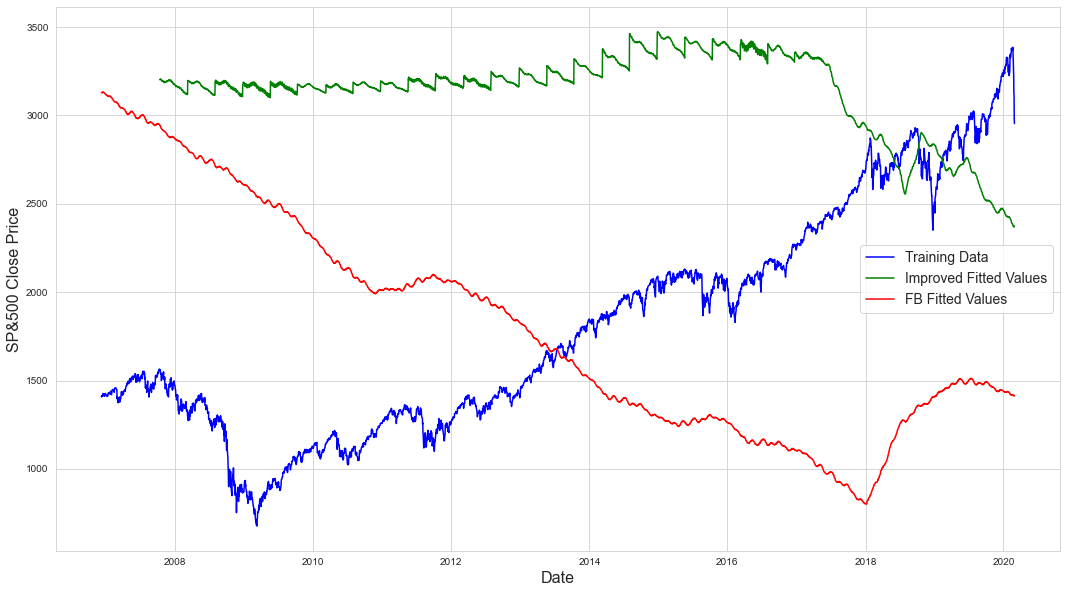

In [26]:
plt.figure(figsize=(18,10))

# plot the training data
plt.plot(df_train.ds,df_train.y,'b', label = "Training Data")

plt.plot(df_train.ds,df_train.fbsp,'g-', label = "Improved Fitted Values")

# plot the fit
plt.plot(df_train.ds, fc_df[:cutoff].fbsp,'r-', label = "FB Fitted Values")

# # # plot the forecast
# plt.plot(df_test.ds, fc_df[cutoff:].fbsp,'r--', label = "FB Forecast")
# plt.plot(df_test.ds,  df_test.fbsp,'g--',label = "Improved Forecast")
# plt.plot(df_test.ds, df_test.y,'b--', label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Date", fontsize=16)
plt.ylabel("SP&500 Close Price", fontsize=16)

plt.show()

In [ ]:
pd.concat([df_train,df_test])

In [ ]:
df_test

In [ ]:
df2 = df.copy()
# df2['fbsp1'] = fc_df.fbsp
# df2['diff1'] =  df2['y'] - df2['fbsp1']
df2['fbsp'] = pd.concat([df_train,df_test]).fbsp
df2['diff'] = df2['y'] - df2['fbsp2']


In [ ]:
df2 = df2.dropna()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2.set_index(df2['ds'])
df2 = df2.drop(columns=['ds'])
df2

In [93]:
df2.to_csv(r'/Users/yuqingdai/Documents/GitHub/Stock-Erdos/scratch work/Yuqing-Data-Merge/data/dt/dff1.csv')